# Линейная регрессия

Подключим библиотеку `pandas` для работы с табличными данными:

In [1]:
import pandas as pd

Считаем таблицу, полученную на [шестом семинаре](lesson_006.ipynb):

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/mikewellmeansme/biological-statistics-course/master/data/grouped_002.csv')

Вспомним, как она выглядит:

In [3]:
df.head()

,Year,Cells,Dmax,CWTmax,TRW
0,1900,25,45.675826,3.321200,868.245102
1,1901,59,48.852504,3.490298,1788.240298
2,1902,37,45.551206,4.679759,1242.799926
3,1903,39,43.509881,4.714577,1212.895952
4,1904,64,39.215885,4.736352,1717.449835


Создадим переменные `x` и `y`, в которые поместим данные по числу клеток в годичном кольце и по ширине этого кольца соответсвенно:

In [4]:
x = df['Cells']
y = df['TRW']

Подключим библиотеку `matplotlib` для визуализации данных:

In [5]:
import matplotlib.pyplot as plt

И вспомним, как выглядит зависимость TRW от Cells:

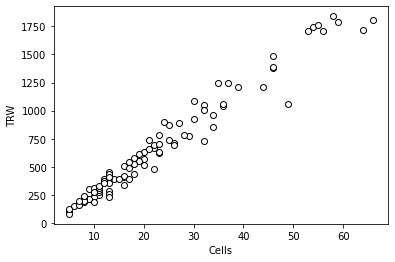

In [6]:
plt.scatter(x, y, color='white', edgecolor='black')
plt.xlabel('Cells')
plt.ylabel('TRW')
plt.show()

Мы видим, что, грубо говоря, TRW от Cells зависит **линейно**, то есть с ростом Cells равномерно растёт и TRW. И на полученном графике мы мысленно можем провести прямую линию, которая будет описывать эту зависимость.

Мо можем провести эту линию "на глаз", но степень обоснованности такого действия близится к нулю.

Нам бы хотелось иметь какой-нибудь легитимный метод описывать линейные зависимости одной единственной прямой линией, пусть даже и не идеально их описывающей. Для этого прибегнем к функциям аппроксимации из бибоиотекм `numpy`.

Импортируем их в наш проект:

In [7]:
from numpy import (
    poly1d,
    polyfit
)

Теперь, при помощи функции `polyfit` из пакета `numpy` получим коэффициенты для лучшей аппроксимации линейной функцией первой степени:

In [8]:
coeffs = polyfit(x, y, deg=1)

Посмотрим на то, что мы получили:

In [9]:
coeffs

array([ 30.48953227, -29.42154051])

При помощи класса `poly1d` из пакета `numpy` создадим линейную функцию на основе этих коэффициентов:

In [10]:
f = poly1d(coeffs)

По факту, теперь `f` представляет собою функцию следующего вида:

$f(x) = 30.48953227 \cdot x -29.42154051$

И мы можем вызывать её от различных `x`:

In [11]:
f(0)

-29.421540513454936

Мы также можем передавать в неё сразу список значений `x` и она вернёт нам значение функции для каждого из них:

In [12]:
f([0,1,2,3,4,5])

array([-29.42154051,   1.06799176,  31.55752404,  62.04705631,
        92.53658859, 123.02612086])

Давайте нарисуем полученную линию поверх наших данных:

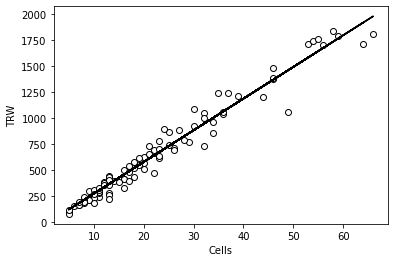

In [13]:
plt.scatter(x, y, color='white', edgecolor='black')
plt.plot(x, f(x), color='black')
plt.xlabel('Cells')
plt.ylabel('TRW')
plt.show()

Видим, что она действительно "очень хорошо" их описывает.

Мы можем даже вывести уравнение прямой на этот график:

In [14]:
equation = f'${coeffs[0]:.2f}\cdot x {"+" if coeffs[1]>0 else ""}{coeffs[1]:.2f}$'

В результате получим следующую строку:

In [15]:
equation

'$30.49\\cdot x -29.42$'

(по окаймляющим её знакам доллара, можно понять, что внутри используется $\LaTeX$ для красивой отрисовки уравнения)

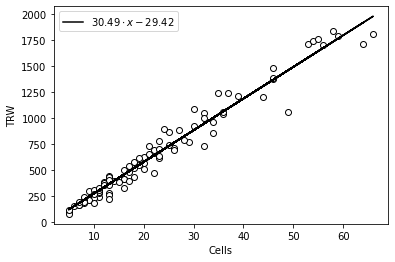

In [16]:
plt.scatter(x, y, color='white', edgecolor='black')
plt.plot(x, f(x), color='black', label=equation)
plt.xlabel('Cells')
plt.ylabel('TRW')
plt.legend()
plt.show()

Выше мы сказали, что эта линия "очень хорошо" описывает наши данные. Напомним, что мы имеем в виду под "очень хорошей линейной зависимостью". Для этого добавим в наш проект функцию расчёта коэффициента корреляции Пирсона и его p-значения:

In [17]:
from scipy.stats import pearsonr

И посчитаем корреляцию (и её p-значение) для наших данных:

In [18]:
r, p_value = pearsonr(x, y)

In [19]:
print(r, p_value)

0.9812822189101578 1.2203975628160528e-72


Мы видим, что коэффициент корреляции близок к $1$, а p-значение меньше, чем все обсуждаемые нами ранее пороги ($0.05$, $0.01$, $0.001$), следовательно линейная корреляция между значениями TRW и Cells статистически значима.

Однако что именно говорит наша большая корреляция? Трактовать её как-то иначе, чем наличие линейной зависимости у нас не получается, мы не можем сказать, насколько линейная функция описывает нашу зависимость.

Для лучшей трактовки степени линейной зависимости прибегнем к новому показателю.

# $R ^ 2$  — коэффициент детерминации

[StatQuest](https://www.youtube.com/watch?v=2AQKmw14mHM&ab_channel=StatQuestwithJoshStarmer)

![r2_001](images/r2_001.png)

![r2_002](images/r2_002.png)

![r2_003](images/r2_003.png)

![r2_004](images/r2_004.png)

![r2_005](images/r2_005.png)

![r2_006](images/r2_006.png)

![r2_007](images/r2_007.png)

![r2_008](images/r2_008.png)

![r2_009](images/r2_009.png)

![r2_010](images/r2_010.png)

![r2_011](images/r2_011.png)

![r2_012](images/r2_012.png)

![r2_013](images/r2_013.png)

Посчитаем $R^2$ на наших данных. Для начала посчитаем среднее значение по TRW:

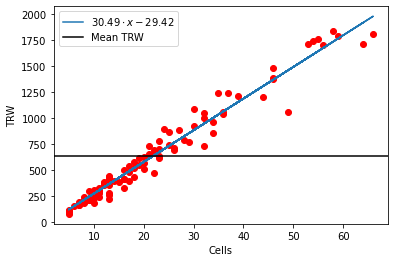

In [20]:
plt.scatter(x, y, color='red')
plt.plot(x, f(x), label=equation)
plt.axhline(y.mean(), label='Mean TRW',  color='black')
plt.xlabel('Cells')
plt.ylabel('TRW')
plt.legend()
plt.show()

Затем напишем функцию для расчёта дисперсии для ряда чисел `X` вокруг ряда чисел `M`:

In [26]:
def var_rel(X, M):
    return ((X - M) ** 2).sum() / (len(X) - 1)

(мы видим, что функция аналогична таковой из [четёртого семинара](lesson_004.ipynb), только вместо среднего значения мы подставлем в неё список значений `M`)

И считаем дисперсию вокруг среднего для TRW:

In [27]:
var_mean = var_rel(y, y.mean())

Визуально говоря, мы усреднили сумму квадратов всех этих отрезков:

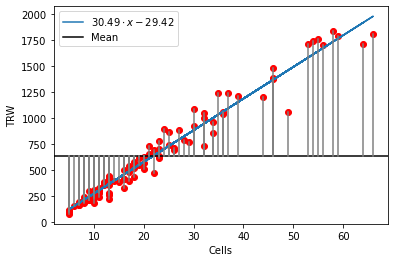

In [28]:
plt.scatter(x, y, color='red', zorder=2)
plt.plot(x, f(x), label=equation)
plt.axhline(y.mean(), label='Mean',  color='black')
for i, j in zip(x, y):
    plt.plot([i, i], [j, y.mean()], c='grey')
plt.xlabel('Cells')
plt.ylabel('TRW')
plt.legend()
plt.show()

И получили следующее значение:

In [29]:
var_mean

215305.13709159291

Теперь посчитаем дисперсию вокруг нашей линии:

In [30]:
var_line = var_rel(y, f(x))

Глядя на визуальное представление, сразу видно, что суммарная длина отрезков (а следовательно и среднее число их квадратов), меньше, чем было:

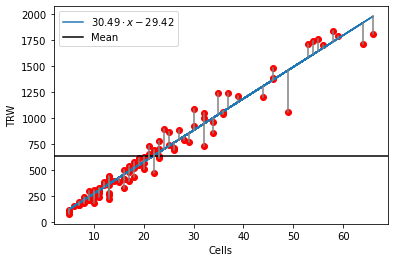

In [31]:
plt.scatter(x, y, color='red', zorder=2)
plt.plot(x, f(x), label=equation)
plt.axhline(y.mean(), label='Mean',  color='black')
for i, j in zip(x, y):
    plt.plot([i, i], [j, f(i)], c='grey')
plt.xlabel('Cells')
plt.ylabel('TRW')
plt.legend()
plt.show()

И значение дисперсии вокруг этой линии равно:

In [32]:
var_line

7984.635545072436

То есть, **дисперсия вокруг линии меньше, чем дисперсия вокруг среднего**

И, наконец, считаем $R^2$:

In [33]:
r2 = (var_mean - var_line) / var_mean 

Получаем наше значение:

In [36]:
r2

0.9629147931492424

Можно оформить это вычисление в виде функции:

In [34]:
def get_r2(y1, y2):
    var_mean = var_rel(y1, y1.mean())
    var_line = var_rel(y1, y2)
    return (var_mean - var_line) / var_mean

Результат будет точно таким же:

In [35]:
get_r2(y, f(x))

0.9629147931492424

$0.96$ или $96\%$.

Иными словами, вокруг линии на $96\%$ меьше дисперсии, чем вокруг среднего.

То есть, эта линия объясняет $96\%$ всей дисперсии в данных.

## Минутка безумия

Несмотря на то, что коэффициент детерминации обозначается как $R^2$, по определению он вовсе **НЕ РАВЕН КВАДРАТУ КОЭФФИЦИЕНТА КОРРЕЛЯЦИИ**.

Коэффициент детерминации и квадрат коэффициента корреляции равны только тогда, когда мы работаем с **ЛИНЕЙНЫМИ МОДЕЛЯМИ**

В нашем случае, мы строили линейный тренд наших данных, поэтому для него квадрат коэффициента корреляции будет равен коэффициенту детерминации:

In [ ]:
r ** 2

0.9629147931492428

Но если мы построим любой нелинейный тренд (параболический, экспоненциальный и т.д.), то мы увидим, что в этих случаях $(R)^2 \ne R^2$! В этом вы можете убедиться выполняя задание.

Однако, поскольку чаще всего работа идёт с линейными трендами, в этих случаях для расчёта $R^2$ нам не нужно каждый раз считать дисперсии, а можно просто возвести в квадрат обычный коэффициент корреляции.

**Но нужно помнить, что в ситуациях, когда мы оцениваем НЕЛИНЕЙНЫЕ зависимости, нам стоит использовать специальные функции для расчёта $R^2$!**

$R^2$ куда проще трактовать — это просто процент объяснённой дисперсии.

При этом сравнивать между собою различные $R^2$ гораздо проще, чем простые $R$ — очевидно, что $49\%$ ($R^2 = 0.49$) объяснёной дисперсии в два раза лучше, чем $25\%$ ($R^2 = 0.25$)! А вот тот факт, что $R=0.7$ в два раза более информативен, чем $R=0.5$ не очевиден.

Поэтому в контексте, когда нам важно показать, что какая-либо **ПРЯМАЯ** линия хорошо описывает наши данные, лучше использовать $R^2$, а не $R$.

## Замечание

Для $R^2$ не установлена оценка значимости, в отличие от $R$.

Для трактовки показателя, всегда лучше обращаться к особенностям предментной области.

Выше мы обнаружили, что число клеток в году объясняет $96\%$ дисперсии Ширины Годичного Кольца — это очевидно хороший показатель, особенно в условиях, когда у нас изначально имеется всего один параметр (число клеток в году).

Если бы мы получили значение в $5\%$, то однозначно бы сочли такой результат не удовлетворительным и мало что объясняющим.

Но если бы мы работали, например, с диагностикой заболеваний, где всегда имеется крайне много параметров, и обнаружили, что один из сотни параметров объясняет $5\%$ дисперсии факта заболевания — тогда бы мы сочли этот результат благоприятным, ведь помимо этого параметра, у нас имелось бы ещё под сотню, каждый из которых мог бы объяснять по несколько процентов дисперсии.

Всегда смотрите на количество ваших параметров при трактовке $R^2$.

# Задание

1. Возьмите за `x` колонку `Cells` из таблицы `df`, а за `y` колонку `CWTmax`;
2. Постройте для них линейную аппроксимацию полиномом первой степени (прямой линией);
3. Постройте график с диаграммой рассеяния этих точек и линию тренда;
4. Вычислите при помощу функции `get_r2` объяснённую дисперсию `y` вокруг этой прямой линии;
5. Вычислите корреляцию между `x` и `y` при помощи функции `pearsonr` из пакета `scipy.stats`. Возведите её в квадрат. Убедитесь, что она равна вычисленному ранее коэффициенту детерминации;
6. Постройте для `x` и `y` линейную аппроксимацию полиномом второй степени (параболой);
7. Постройте график с диаграммой рассеяния этих точек и кривую тренда;
8. Вычислите при помощу функции `get_r2` объяснённую `y` вокруг этой параболы;
9. Убедитесь, что квадрат корреляции между `x` и `y`, вычисленный в пункте 5 не равен новому коэффициенту детерминации;
10. Сравните, какая аппроксимация лучше и во сколько раз.

**Замечание**: для нормального отображения графика параболы, подавайте на вход функции аппроксимации отсортированный при помощу функции `sorted` список. То есть: 

`plt.plot(sorted(x), f(sorted(x)))`

вместо 

`plt.plot(x, f(x))`.

Иначе у вас будет выходить страшная ломанная.